# TinySOM examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tinysom import SOM, SOM_cluster, SOM_classify
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm.auto import tqdm

### Blobs

In [2]:
X, y = make_blobs(n_samples=1000, cluster_std=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

#### Embedding

  0%|          | 0/100 [00:00<?, ?it/s]

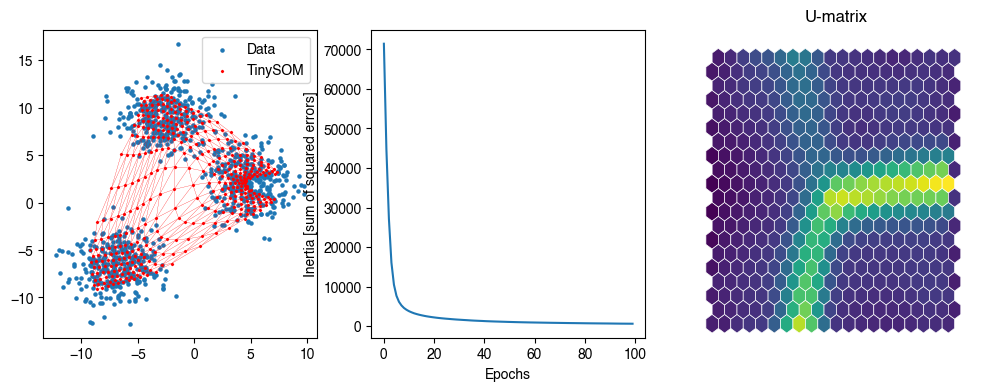

In [3]:
som = SOM(n_rows=20, n_cols=20, topology='hex', n_epochs=100, metric='euclidean', neighbourhood='gaussian',
          initial='pca', weight_t0_Rmax=0.85, weight_tN_Rmin=0.1)
som.fit(X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.scatter(X[:,0], X[:,1], s=5, label='Data')
som.plot_mesh2d(ax=ax1); ax1.legend();
ax2.plot(som.inertia_)
ax2.set_xlabel('Epochs'); ax2.set_ylabel('Inertia [sum of squared errors]');
som.plot_umatrix(ax=ax3);

In [4]:
print(f'Fraction of variance explained: {som.varexp:4f}')
print(f'Topological error: {som.topoerr:.4f}')

Fraction of variance explained: 0.991671
Topological error: 0.0220


#### Unsupervised clustering and supervised classification

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

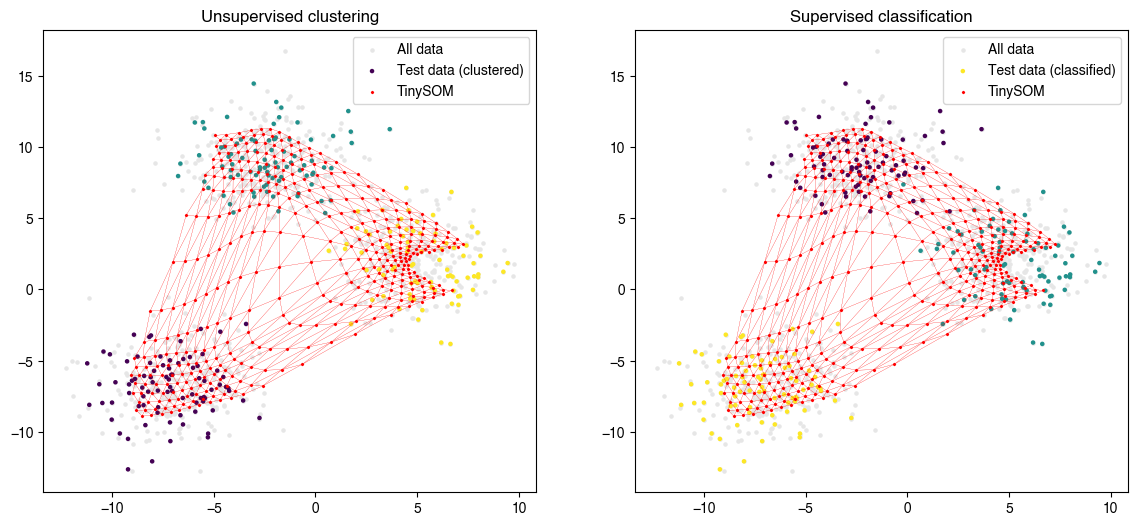

In [5]:
som_clu = SOM_cluster(n_rows=20, n_cols=20, n_epochs=100, metric='euclidean', neighbourhood='gaussian', initial='pca',
                      weight_t0_Rmax=0.85, weight_tN_Rmin=0.1, n_clusters=3)
som_cla = SOM_classify(n_rows=20, n_cols=20, n_epochs=100, metric='euclidean', neighbourhood='gaussian', initial='pca', 
                       weight_t0_Rmax=0.85, weight_tN_Rmin=0.1)
som_clu.fit(X_train)
som_cla.fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(X[:,0], X[:,1], s=5, c='0.9', label='All data'); ax2.scatter(X[:,0], X[:,1], s=5, c='0.9', label='All data')
ax1.scatter(X_test[:,0], X_test[:,1], s=5, c=som_clu.predict(X_test), label='Test data (clustered)')
som_clu.plot_mesh2d(ax=ax1); ax1.legend();
ax2.scatter(X_test[:,0], X_test[:,1], s=5, c=som_cla.predict(X_test), label='Test data (classified)')
som_cla.plot_mesh2d(ax=ax2); ax2.legend();
ax1.set_title('Unsupervised clustering'); ax2.set_title('Supervised classification');

### Moons

In [6]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

#### Embedding

  0%|          | 0/100 [00:00<?, ?it/s]

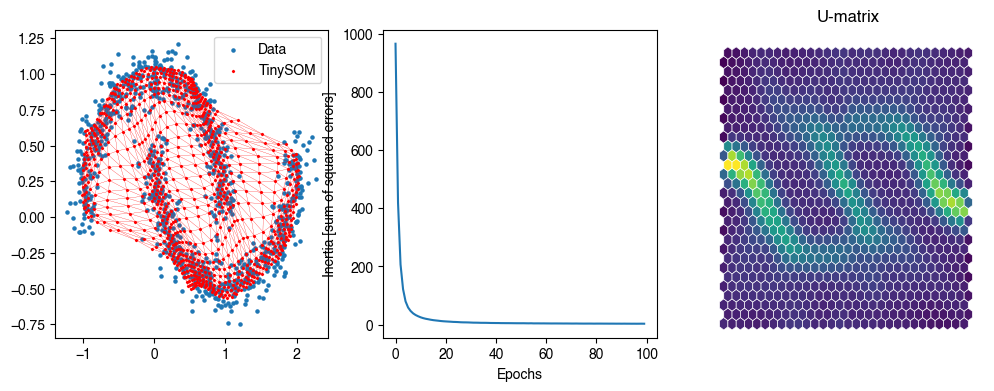

In [7]:
som = SOM(n_rows=30, n_cols=30, topology='hex', n_epochs=100, metric='euclidean', neighbourhood='gaussian',
          initial='pca', weight_t0_Rmax=0.85, weight_tN_Rmin=0.1, unit_dropout_factor=0.5)
som.fit(X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.scatter(X[:,0], X[:,1], s=5, label='Data')
som.plot_mesh2d(ax=ax1); ax1.legend();
ax2.plot(som.inertia_)
ax2.set_xlabel('Epochs'); ax2.set_ylabel('Inertia [sum of squared errors]');
som.plot_umatrix(ax=ax3);

In [8]:
print(f'Fraction of variance explained: {som.varexp:4f}')
print(f'Topological error: {som.topoerr:.4f}')

Fraction of variance explained: 0.996965
Topological error: 0.0750


#### Unsupervised clustering and supervised classification

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

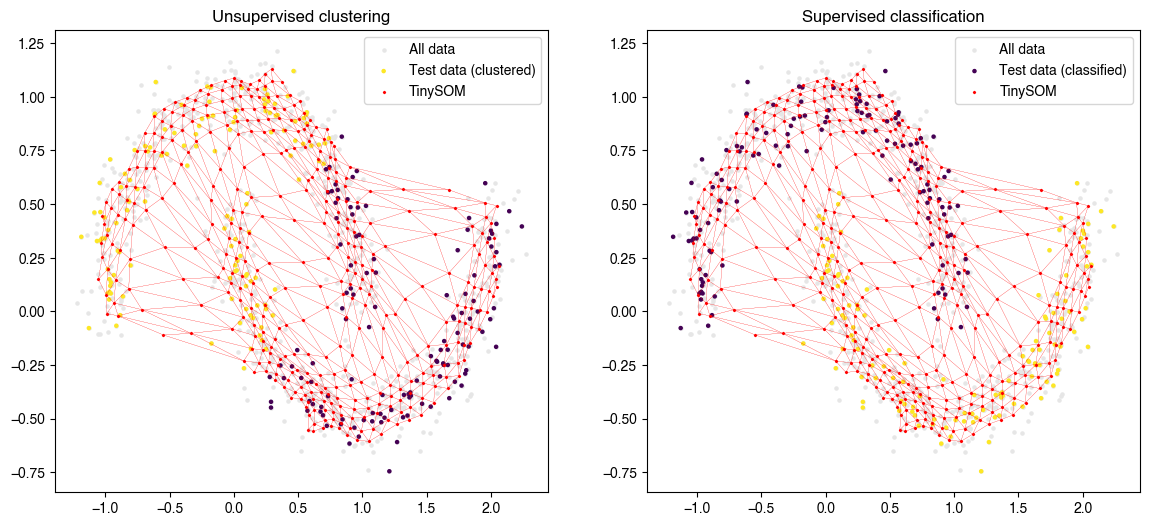

In [9]:
som_clu = SOM_cluster(n_rows=20, n_cols=20, n_epochs=100, metric='euclidean', neighbourhood='gaussian', initial='pca',
                      weight_t0_Rmax=0.5, weight_tN_Rmin=0.01, n_clusters=2)
som_cla = SOM_classify(n_rows=20, n_cols=20, n_epochs=100, metric='euclidean', neighbourhood='gaussian', initial='pca', 
                       weight_t0_Rmax=0.5, weight_tN_Rmin=0.01)
som_clu.fit(X_train)
som_cla.fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(X[:,0], X[:,1], s=5, c='0.9', label='All data'); ax2.scatter(X[:,0], X[:,1], s=5, c='0.9', label='All data')
ax1.scatter(X_test[:,0], X_test[:,1], s=5, c=som_clu.predict(X_test), label='Test data (clustered)')
som_clu.plot_mesh2d(ax=ax1); ax1.legend();

ax2.scatter(X_test[:,0], X_test[:,1], s=5, c=som_cla.predict(X_test), label='Test data (classified)')
som_cla.plot_mesh2d(ax=ax2); ax2.legend();
ax1.set_title('Unsupervised clustering'); ax2.set_title('Supervised classification');

### Circles

In [10]:
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

  0%|          | 0/100 [00:00<?, ?it/s]

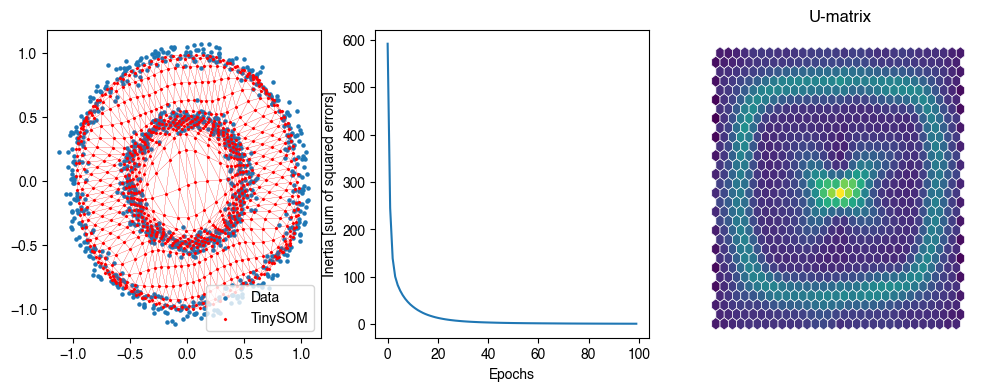

In [11]:
som = SOM(n_rows=30, n_cols=30, n_epochs=100, metric='euclidean', neighbourhood='gaussian', initial='pca', 
          weight_t0_Rmax=0.85, weight_tN_Rmin=0.1)
som.fit(X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.scatter(X[:,0], X[:,1], s=5, label='Data')
som.plot_mesh2d(ax=ax1); ax1.legend();
ax2.plot(som.inertia_)
ax2.set_xlabel('Epochs'); ax2.set_ylabel('Inertia [sum of squared errors]');
som.plot_umatrix(ax=ax3);

#### Unsupervised clustering and supervised classification

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

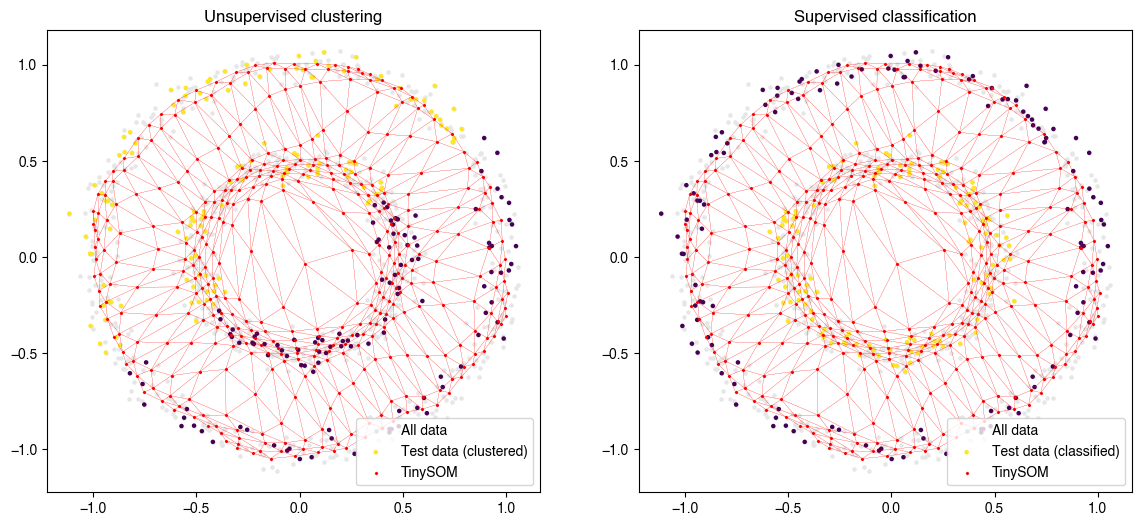

In [12]:
som_clu = SOM_cluster(n_rows=20, n_cols=20, n_epochs=100, metric='euclidean', neighbourhood='gaussian', initial='pca',
                      weight_t0_Rmax=0.5, weight_tN_Rmin=0.01, n_clusters=2)
som_cla = SOM_classify(n_rows=20, n_cols=20, n_epochs=100, metric='euclidean', neighbourhood='gaussian', initial='pca', 
                       weight_t0_Rmax=0.5, weight_tN_Rmin=0.01)
som_clu.fit(X_train)
som_cla.fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(X[:,0], X[:,1], s=5, c='0.9', label='All data'); ax2.scatter(X[:,0], X[:,1], s=5, c='0.9', label='All data')
ax1.scatter(X_test[:,0], X_test[:,1], s=5, c=som_clu.predict(X_test), label='Test data (clustered)')
som_clu.plot_mesh2d(ax=ax1); ax1.legend();

ax2.scatter(X_test[:,0], X_test[:,1], s=5, c=som_cla.predict(X_test), label='Test data (classified)')
som_cla.plot_mesh2d(ax=ax2); ax2.legend();
ax1.set_title('Unsupervised clustering'); ax2.set_title('Supervised classification');

### Fisher's iris dataset

In [13]:
iris = load_iris()
X, y = iris['data'], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=iris.target)

iris_labels = iris.target_names[iris.target]
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names, index=iris_labels).rename_axis('label').reset_index()
iris_df.head(2)

label  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0  setosa                5.1               3.5                1.4   
1  setosa                4.9               3.0                1.4   

   petal width (cm)  
0               0.2  
1               0.2

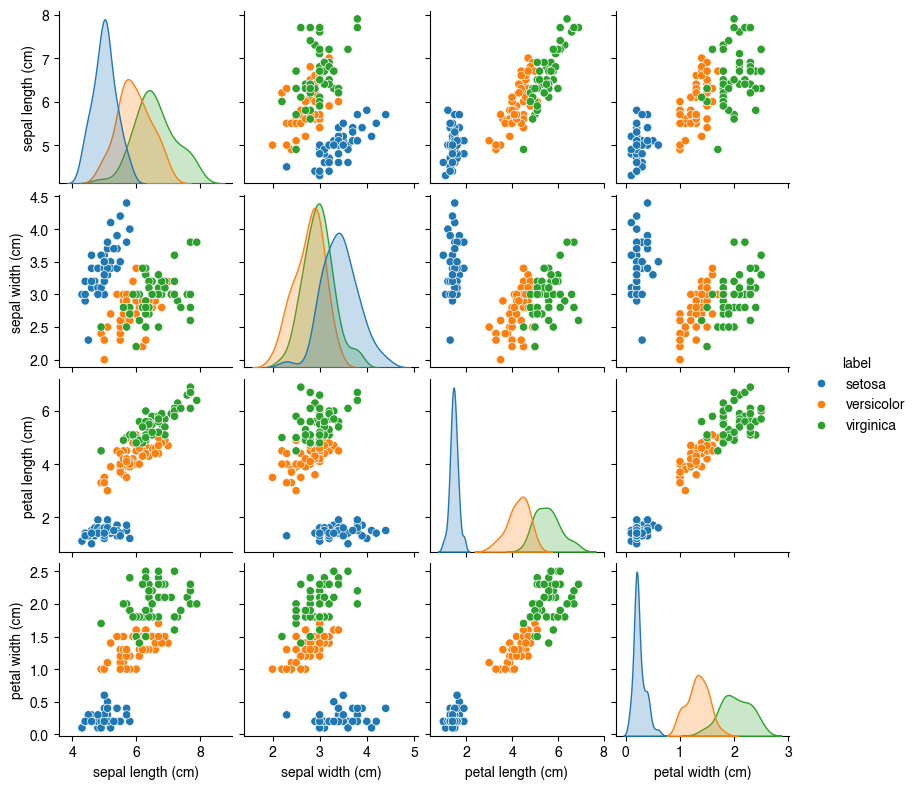

In [14]:
sns.pairplot(iris_df, hue='label', height=2);

In [15]:
som_cla = SOM_classify(n_rows=30, n_cols=30, n_epochs=100, metric='cosine', neighbourhood='gaussian', initial='pca', 
                       weight_t0_Rmax=0.9, weight_tN_Rmin=0.1, unit_dropout_factor=0.5)
som_cla.fit(X_train, y_train)
print(classification_report(y_test, som_cla.predict(X_test)))

  0%|          | 0/100 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



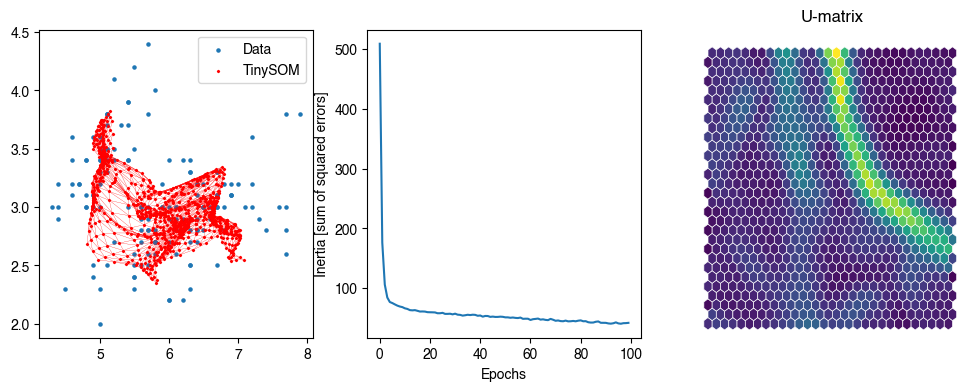

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
i, j = 0, 1
ax1.scatter(X[:,i], X[:,j], s=5, label='Data')
som_cla.plot_mesh2d(ax=ax1, feature_ixs=[i,j]); ax1.legend();
ax2.plot(som_cla.inertia_)
ax2.set_xlabel('Epochs'); ax2.set_ylabel('Inertia [sum of squared errors]');
som_cla.plot_umatrix(ax=ax3);

In [17]:
print(f'Fraction of variance explained: {som_cla.varexp:4f}')
print(f'Topological error: {som_cla.topoerr:.4f}')

Fraction of variance explained: 0.918774
Topological error: 0.0536


### MNIST digits

In [18]:
digits = load_digits()
print(digits['data'].shape)
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits.target, test_size=0.5, stratify=digits.target)

(1797, 64)


In [19]:
somc = SOM_classify(n_rows=20, n_cols=20, topology='hex', n_epochs=100, metric='cosine', neighbourhood='gaussian', 
                    initial='random', weight_t0_Rmax=0.2, weight_tN_Rmin=0.01, unit_dropout_factor=0.)
somc.fit(X_train, y_train)
print(classification_report(y_test, somc.predict(X_test)))

  0%|          | 0/100 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       0.94      0.97      0.95        91
           2       0.96      0.99      0.97        88
           3       0.99      0.89      0.94        92
           4       0.98      0.97      0.97        91
           5       0.91      0.98      0.94        91
           6       0.99      0.93      0.96        91
           7       0.96      0.96      0.96        89
           8       0.93      0.86      0.89        87
           9       0.90      0.97      0.93        90

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



In [20]:
print(f'Fraction of variance explained: {somc.varexp:4f}')
print(f'Topological error: {somc.topoerr:.4f}')

Fraction of variance explained: 0.815321
Topological error: 0.0657


  0%|          | 0/400 [00:00<?, ?it/s]

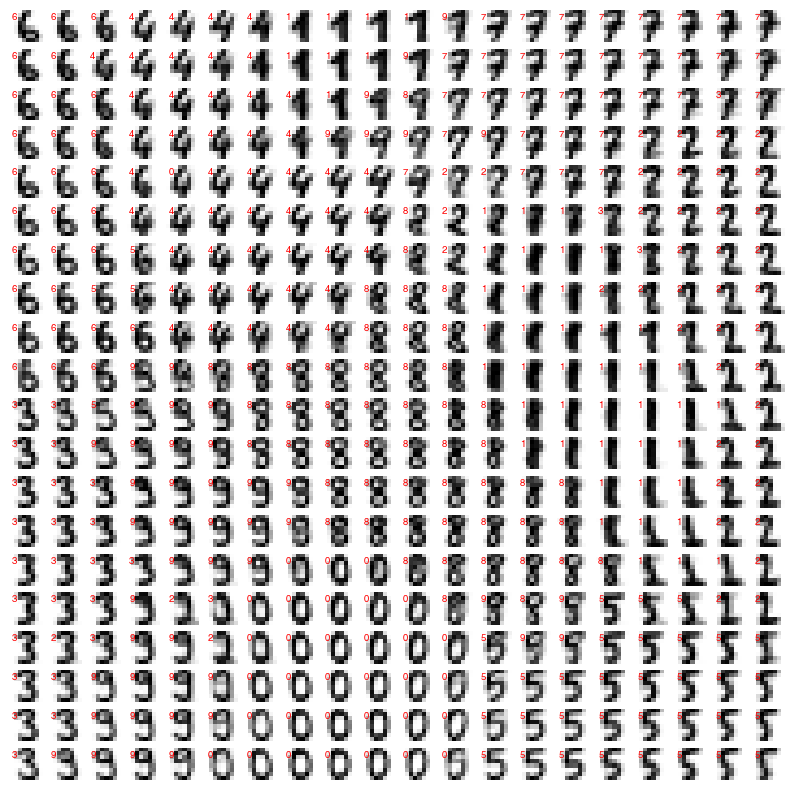

In [21]:
d = 0.5
fig, axes = plt.subplots(somc.n_rows, somc.n_cols, figsize=(d*somc.n_cols,d*somc.n_rows))
for k in tqdm(range(somc.n_cols*somc.n_rows)):
    i, j = k//somc.n_cols, k%somc.n_cols
    ax = axes[i][j]
    ax.imshow(somc.wts[k].reshape((8,8)), cmap='gray_r')
    ax.set_xticklabels([]); ax.set_yticklabels([]);
    ax.set_xticks([]); ax.set_yticks([]);
    ax.text(0, 2, f'{int(somc.neuron_to_label[k])}', fontsize=7, color='r')
    ax.axis('off');

Example of U-matrix sharpening:

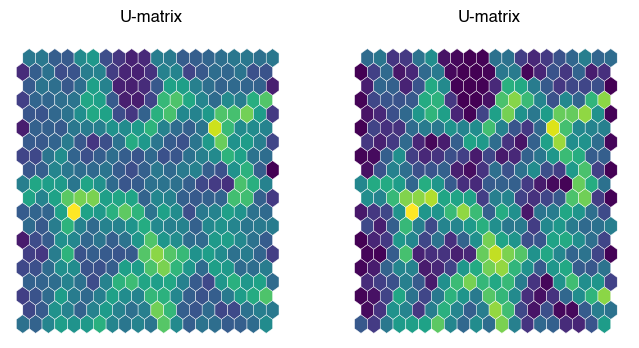

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
somc.plot_umatrix(ax=ax1)
somc.sharpen_umat(d=0.5)
somc.plot_umatrix(sharp=True, ax=ax2);

### Fashion MNIST

In [23]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [24]:
with open('../data/Fashion-MNIST/train-images-idx3-ubyte', 'rb') as f:
    X_train = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    X_train = X_train.reshape((-1, 28*28))

with open('../data/Fashion-MNIST/train-labels-idx1-ubyte', 'rb') as f:
    y_train = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

with open('../data/Fashion-MNIST/t10k-images-idx3-ubyte', 'rb') as f:
    X_test = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    X_test = X_test.reshape((-1, 28*28))

with open('../data/Fashion-MNIST/t10k-labels-idx1-ubyte', 'rb') as f:
    y_test = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

In [25]:
pct = 0.01
n_train = int(pct*X_train.shape[0])
n_test = int(pct*X_test.shape[0])

train_subset = np.random.choice(range(X_train.shape[0]),size=n_train)
test_subset = np.random.choice(range(X_test.shape[0]),size=n_test)
print(n_train)

600


In [26]:
somc = SOM_classify(n_rows=30, n_cols=30, n_epochs=100, metric='cosine', neighbourhood='gaussian', initial='random', 
                    weight_t0_Rmax=0.1, weight_tN_Rmin=0.01, unit_dropout_factor=0.3)
somc.fit(X_train[train_subset,:], y_train[train_subset])
print(classification_report(y_test[test_subset], somc.predict(X_test[test_subset,:])))

  0%|          | 0/100 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       1.00      0.91      0.95        11
           2       0.77      0.83      0.80        12
           3       0.73      0.80      0.76        10
           4       0.57      0.36      0.44        11
           5       0.00      0.00      0.00         6
           6       0.36      0.67      0.47         6
           7       0.56      0.33      0.42        15
           8       1.00      0.90      0.95        10
           9       0.62      1.00      0.76         8

    accuracy                           0.67       100
   macro avg       0.65      0.66      0.64       100
weighted avg       0.69      0.67      0.67       100



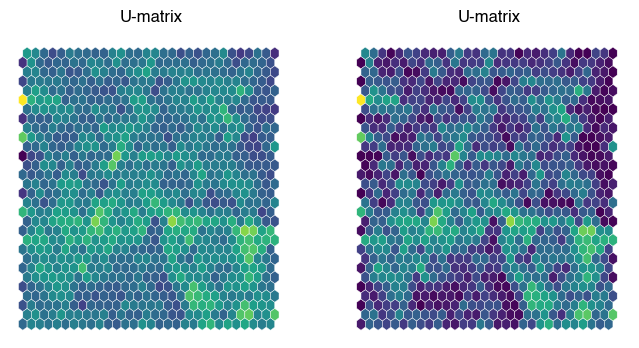

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
somc.plot_umatrix(ax=ax1)
somc.sharpen_umat(d=0.5)
somc.plot_umatrix(sharp=True, ax=ax2);

  0%|          | 0/900 [00:00<?, ?it/s]

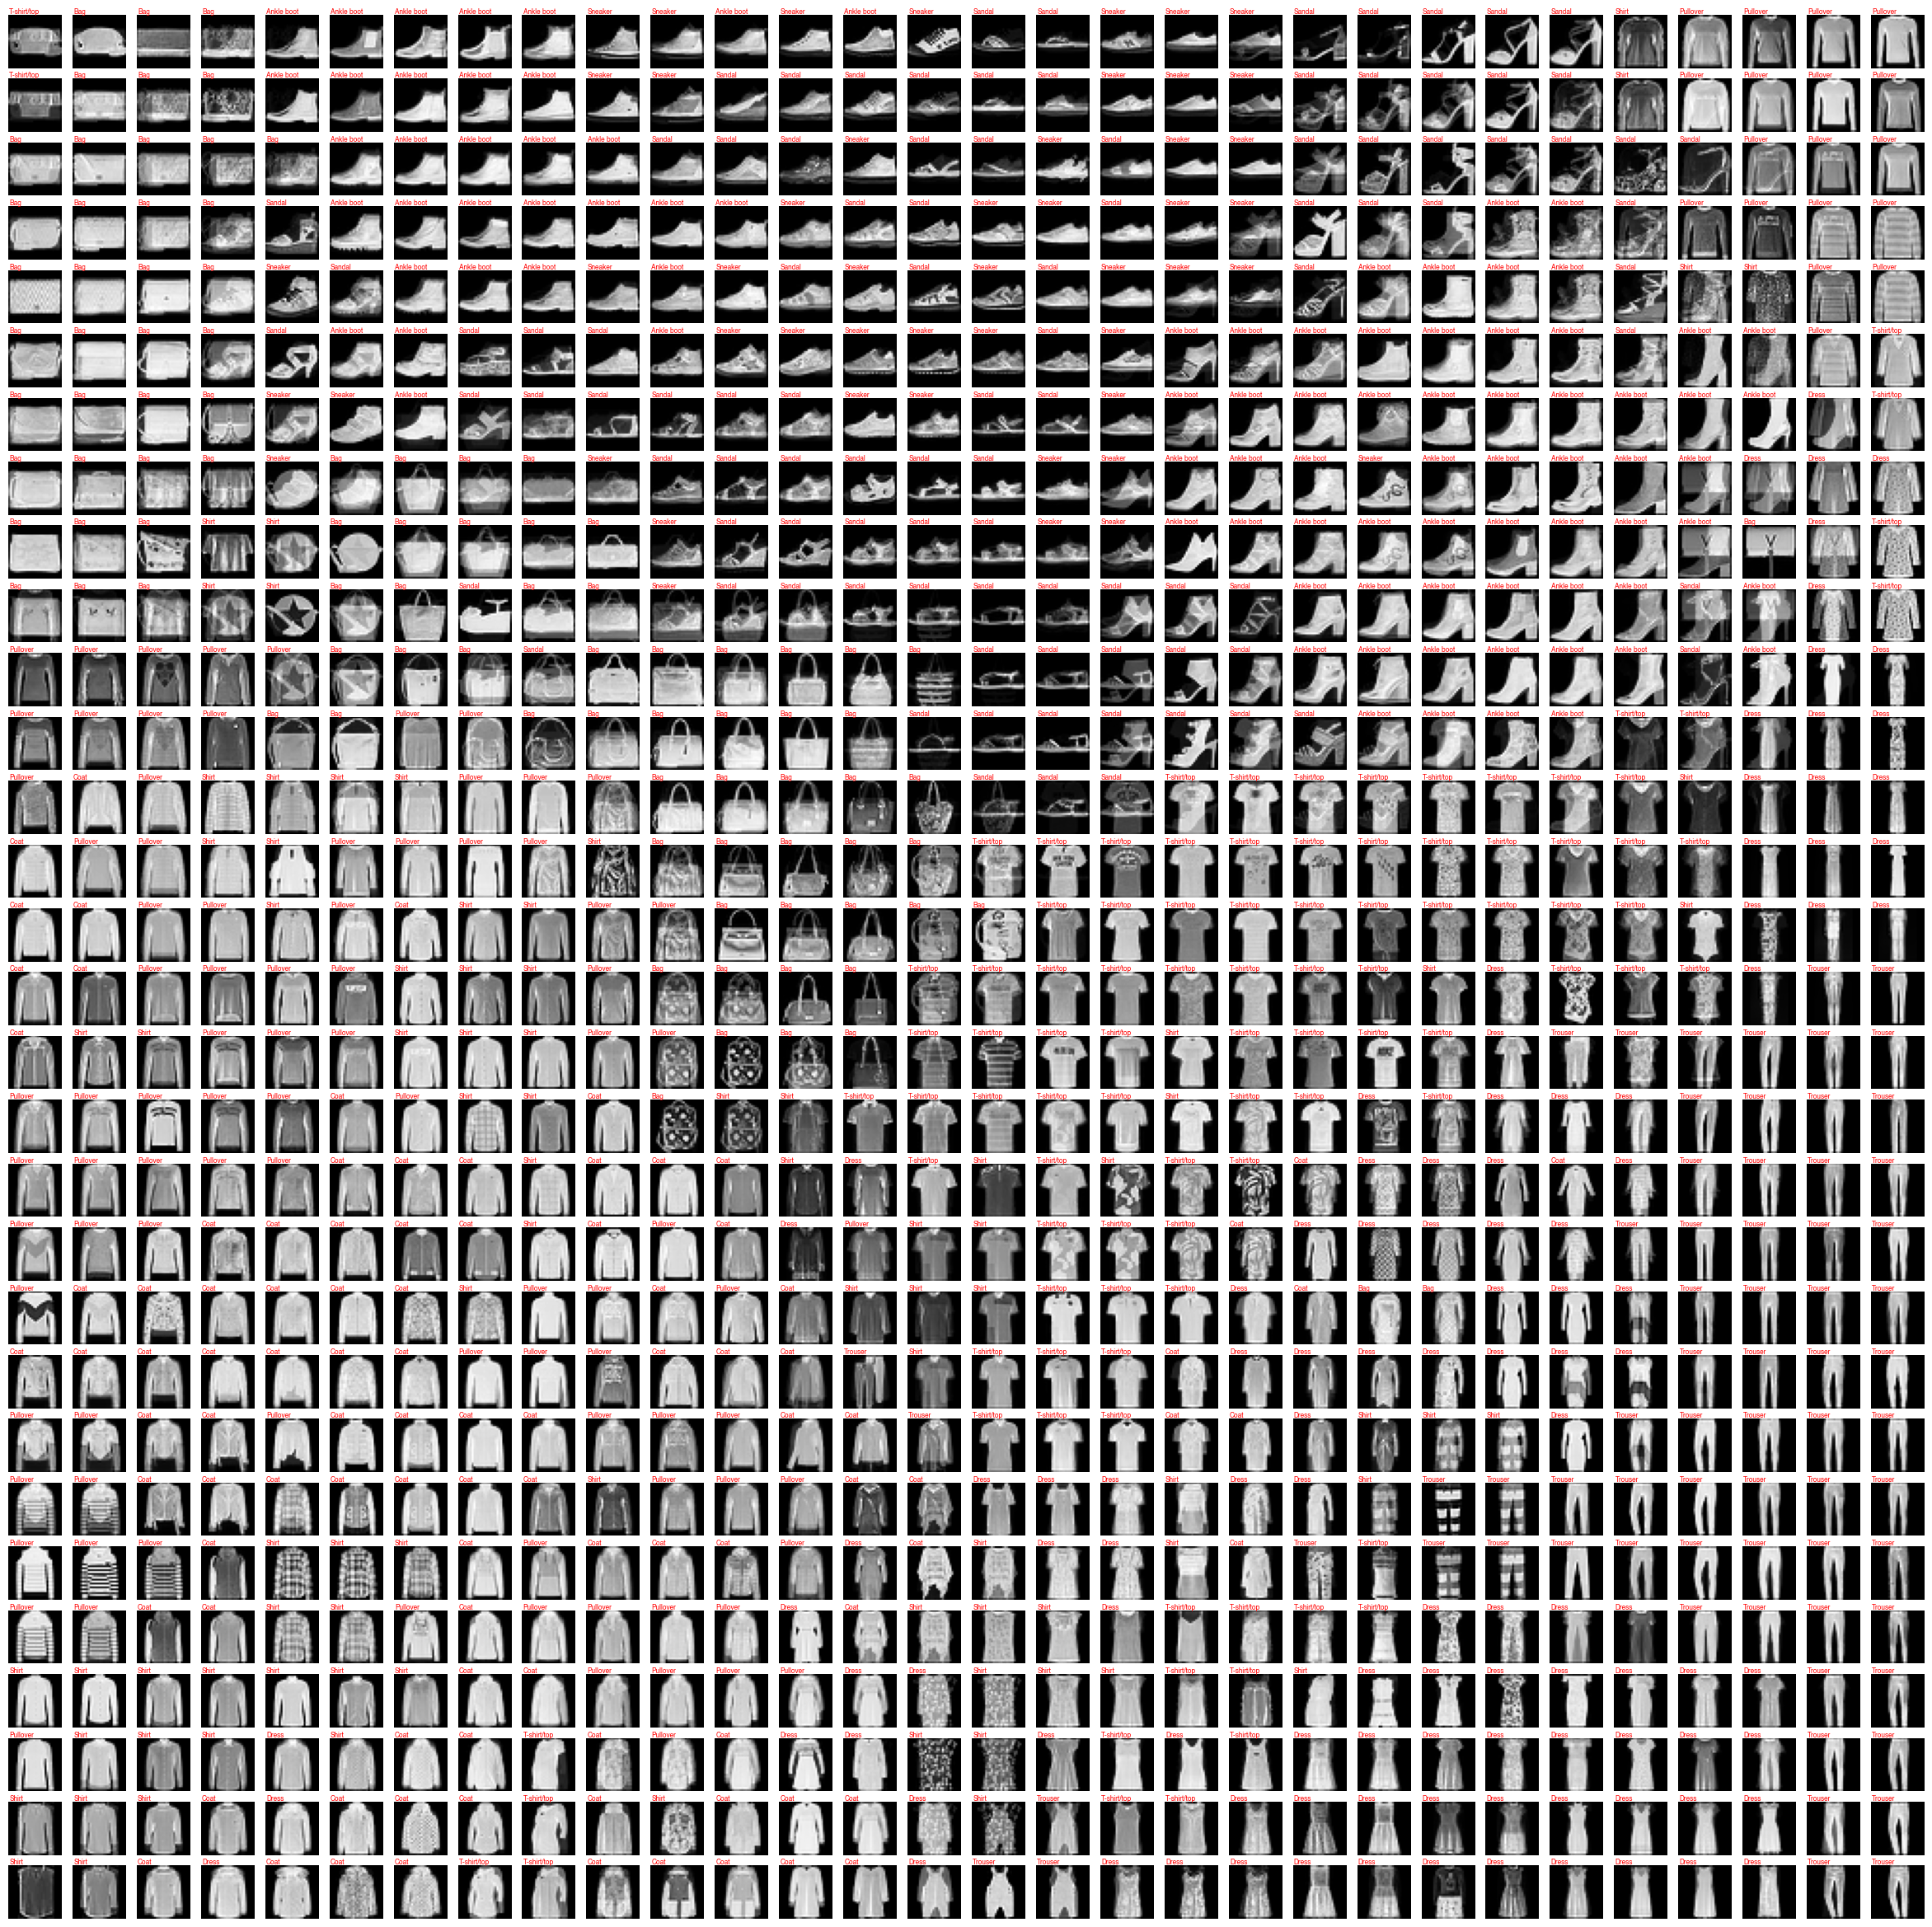

In [28]:
d = 1
fig, axes = plt.subplots(somc.n_rows, somc.n_cols, figsize=(d*somc.n_cols,d*somc.n_rows))
for k in tqdm(range(somc.n_cols*somc.n_rows)):
    i, j = k//somc.n_cols, k%somc.n_cols
    ax = axes[i][j]
    ax.imshow(somc.wts[k].reshape((28,28)), cmap='gray')
    ax.set_xticklabels([]); ax.set_yticklabels([]);
    ax.set_xticks([]); ax.set_yticks([]);
    ax.text(0, -1, f'{labels[int(somc.neuron_to_label[k])]}', fontsize=6, color='r')
    ax.axis('off'); #plt.grid(False);

# Potential improvements

- Some sort of sparsification in weights - L1 penalty or top-K sparsification
- Add parallelisation
- Improve unsupervised clustering, e.g. using a binarised version of the U-matrix, then identify connected components which are effectively clusters: https://stackoverflow.com/questions/11016256/connected-components-in-a-graph-with-100-million-nodes